In [51]:
import math
import numpy as np
from numpy import linalg
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t




In [52]:
# 1a
x = np.linspace(-10,10,100)
pij = []
qij = []
for i in range(100):
    for j in range(100):
        # pij.append(math.exp(-(linalg.norm(x[i] - x[j])**2)/(2*sigmai**2)))
        # qij.append()
        pass
for i in range(100):
    pass#pij[i] /= sum()
    
# b


c:\Users\Felix\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Felix\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


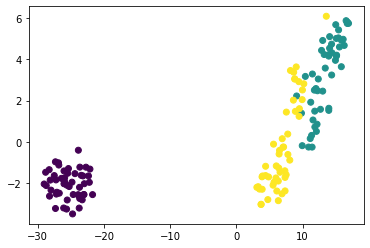

In [64]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Use t-SNE to reduce the data to 2 dimensions
X_tsne = TSNE(n_components=2).fit_transform(X)

# Plot the reduced data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

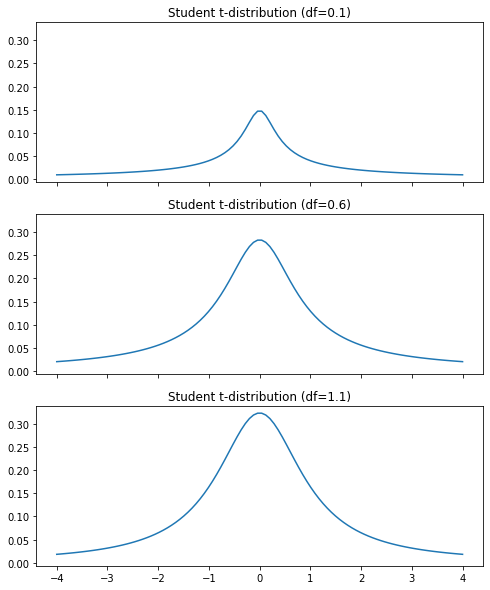

In [53]:


# Create a range of x values from -4 to 4
x = np.linspace(-4, 4, 100)

# Create a subplot with 3 rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=True, sharey=True)

for i in range(3):
    df = (i*5+1)/10
    # Plot the student t-distribution with 5 degrees of freedom
    tdist = t(df=df)
    y = tdist.pdf(x)
    axes[i].plot(x, y)
    axes[i].set_title(f"Student t-distribution (df={df})")

# Show the plot
plt.show()


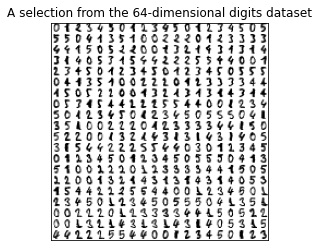

In [54]:
# 2a
# Packages to perform dimensionality reduction
import sklearn.datasets
import sklearn.decomposition
import sklearn.manifold

# Packages for plotting
import matplotlib.pyplot as plt
from matplotlib import offsetbox
# Load the data from sklearn (number 0 to 5 only)
digits = sklearn.datasets.load_digits(n_class=6)

# Store the data and targets
digit_images = digits.data
digit_classes = digits.target

# The data are rows of pixel values, and each pixel value is a feature (64 pixels in an 8x8 image).
n_samples, n_features = digit_images.shape

# Take a look at the data
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10*i + 1
    for j in range(n_img_per_row):
        iy = 10*j + 1
        img[ix:ix + 8, iy:iy + 8] = digit_images[i * n_img_per_row + j].reshape((8,8))
        
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset');



In [55]:
def plot_embedding(embed, title=None, show_classes=True, show_examples=True):
    # Determine range of values of embedded points
    x_min, x_max = np.min(embed, 0), np.max(embed, 0)
    # Scale all points between 0 and 1
    scaled_embed = (embed - x_min) / (x_max - x_min)
    
    # Instantiate figure
    plt.figure()
    ax = plt.subplot(111)
    
    if show_classes:
        # Color each number differently (shows how we expect data to cluster)
        for i in range(scaled_embed.shape[0]):
            plt.plot(scaled_embed[i,0], scaled_embed[i,1], '.',
                     color = plt.cm.Set1(digit_classes[i]/10))
    else:
        plt.plot(scaled_embed[:,0], scaled_embed[:,1], '.k')
    
    if show_examples:
        if hasattr(offsetbox, 'AnnotationBbox'):
            # Only print thumbnail with matplotlib > 1.0;
            # initialize shown_images array
            shown_images = np.array([[1, 1]])

            # Iterate through the number of digits we imported
            for i in range(digits.data.shape[0]):
                dist = np.sum((scaled_embed[i] - shown_images) **2, 1)
                # Don't put thumbnails too close together
                if np.min(dist) < 4e-3:
                    continue
                # Concatenate the  locations of the images to be plotted
                shown_images = np.r_[shown_images, [scaled_embed[i]]]
                # Define the grayscale image of the number
                imagebox = offsetbox.AnnotationBbox(
                    offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                    scaled_embed[i])
                ax.add_artist(imagebox)
                
    # Remove x and y ticks
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [56]:
# 3
X = np.array([[64,580,29],[66,570,33],[68,590,37],[69,660,46],[73,600,55]])
Xmean = np.array([np.mean(X[:,0]), np.mean(X[:,1]), np.mean(X[:,2])])
print(X, "\n mean", Xmean)
N = len(X)
n = len(X[0])
A = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        sum = 0
        for k in range(N):
            sum += (X[k,i]-Xmean[i])*(X[k,j]-Xmean[j])
        A[i,j] = sum/(N-1)
        A[j,i] = A[i,j]
print(A)
print(np.cov(X.T))

[[ 64 580  29]
 [ 66 570  33]
 [ 68 590  37]
 [ 69 660  46]
 [ 73 600  55]] 
 mean [ 68. 600.  40.]
[[  11.5    50.     34.75]
 [  50.   1250.    205.  ]
 [  34.75  205.    110.  ]]
[[  11.5    50.     34.75]
 [  50.   1250.    205.  ]
 [  34.75  205.    110.  ]]
